<a href="https://colab.research.google.com/github/Carlos-Ivan-Hernandez-Lopez/Simulacion-II/blob/main/%5CExamen1%5CProblema1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instituto Politécnico Nacional 

Escuela superior de física y matemáticas

Simulación II

Primer examen parcial.

Carlos Iván Hernández López

# 16. Dos personas han quedado citas en un determinado lugar. 
Ambas tieen la misma probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0,30].

Determínese la probabilidad de que el tiempo que una persona espera a la otra sea como máximo 10.

## Solución por simulación

Utilizando la metodologia de la simulación.

In [ ]:
# Se importan las librerias que usaremos.
import numpy as np
import random as rd
import matplotlib.pyplot as plt

### Paso 1: Define las variables
Usaremos dos variables aleatorias para representar a las personas involucradas.
```
Persona1
Persona2
```



### Paso 2 y 3: Determine la distribución de probabilidad y modele las variables aleatorias.
Por las condiciones que establece el problema, las dos variables aleatorias tendran distribución uniforme continua en el intervalo (0,30)

$$Persona1∼U(0,30)$$
$$Persona2∼U(0,30)$$


### Paso 4: Defina el modelo del sistema y los objetivos de la simulación.

El modelo que utilizaremos para representar el sistema realizara una diferencia entre los valores de las varibles `Persona1` y `Persona2` y tomaremos su valor abusoluto.

$$|Persona1-Persona2|$$

Cuando esta diferencia sea menor o igual a 10 se guardara una victoria, en caso contrario se guardara un fracaso. Con el objetivo de que al repetir varias veces el experimento podamos obtener la probabilidad de exito del experimento.

In [ ]:
def retardo():    #Esta funcion devuelve un 1 cuando una persona espera 10 minutos o menos a la otra y devuelve un 0 cuando esto no ocurre.
  Victoria=0
  Persona1=rd.randrange(0,30) #La funcion randrange devuelve un valor aleatorio con distribución uniforme en un rango especificado.
  Persona2=rd.randrange(0,30) 
  if abs(Persona1-Persona2)<=10:  
    Victoria+=1  
  return Victoria    

### Paso 5: Diseñe el experimento.
Para determinar la probabilidad de que ocurra una victoria realizaremos `n` simulaciones del modelo, guardando las probabilidades acumuladas.

In [ ]:
def prob_atiempo(n): #Esta funcion devuelve una lista con las probabilidades acumuladas en cada repeticion i para n repeticiones.
  Probabilidad=[] 
  atiempo=0 
  for i in range(n):
    atiempo += retardo()
    Probabilidad.append(atiempo/(i+1))
  return Probabilidad

In [ ]:
x = prob_atiempo(400) #Asignamos un valor a n.

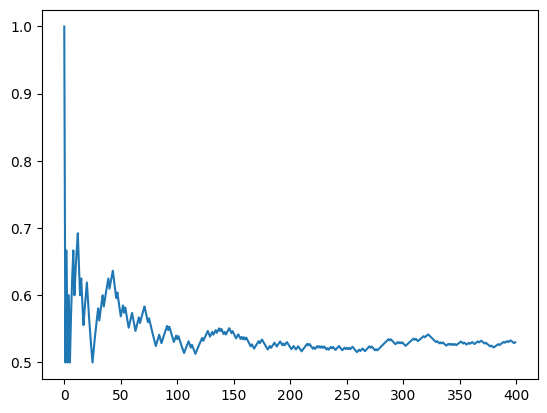

In [ ]:
plt.plot(x) #Graficamos los valores obtenidos.

In [ ]:
Media=np.mean(x) #Obtenemos la media de las probabilidades guardadas.
DesEst=np.std(x) #Obtenemos la desviacion estandar de la probabilidades.
print(Media,DesEst)

0.5405522032914082 0.03594164919977537


### Paso 6: Repita el experimento $N$ veces.
Para encontrar el valor de $N$ usaremos el teorema central del limite
$$N>(2σz_{α/2}/ϵ)^2$$
Con los parametros obtenidos en la corrida anterior y $α=0.95$, $ϵ=0.01$

In [ ]:
N=(2*DesEst*1.96/0.01)**2 #El teorema central del limite nos dara una aproximacion a la cantidad de reprticiones que se requieren para que el experimento
print(N)                  #regrese resultados confiables.

198.5034851472968


Repetiremos el experimento 199 veces para obtener un nivel de confianza del 95%.

Para repetir el experimento utilizaremos la siguiente función

In [ ]:
def rep(j):
  lista=[]
  for i in range(j):
    r=prob_atiempo(400)
    lista.append(np.mean(r))
  return lista

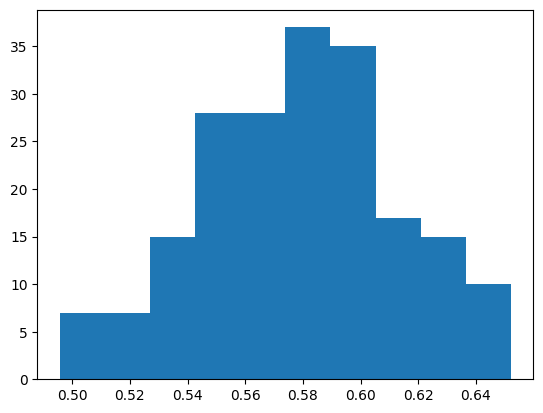

In [ ]:
Y=rep(199)
plt.hist(Y)
plt.show()

In [ ]:
X=np.mean(Y) #Obtenemos la media y la desviacion estandar de todos los experimentos
s=np.std(Y)
print(X,s)

0.5782561863306245 0.03392348891982906


### Paso 7. Obtener el intervalo de confianza.
Para obtener el intervalo de confianza usaremos
$$\bar{x}-z_{α/2}*s/\sqrt{n}<μ<\bar{x}+z_{α/2}*s/\sqrt{n}$$
con un nivel de confianza del 95%

In [ ]:
li=X-(1.96*s/np.sqrt(N)) #Se calculan los limites con los parametros que tenemos.
ls=X+(1.96*s/np.sqrt(N))
print('El intervalo de confianza es:[', li, ',', ls, ']')

El intervalo de confianza es:[ 0.5735369414329751 , 0.5829754312282739 ]


## Solución analitica
Como definimos anteriormente tenemos dos variables aleatorias continuas identicamente distribuidas uniformes. Ambas tienen la misma funcion de densidad.

$$f(x_i)=1/(b-a)=1/(30-0)=1/30 \\ i=1,2.$$

Por lo que la funcion de distribución continua es
$$f(x_1,x_2)=\begin{cases} 1/30^2 & 0\leq x_1 \leq 30, 0\leq x_2 \leq 30 \\ 0 & \text{en otro caso}  \end{cases}$$

Buscamos el área que cumple con la condicion $U=|x_1-x_2|\leq10$ por lo que primero debemos de resolver por separado las ecuaciones.
$$x_1-x_2\leq 10$$
$$x_1-x_2\geq -10$$

Elegimos $x_2$ como la variable dependiente y tenemos
$$x_2\leq x_1-10$$
$$x_2\geq x_1+10$$
Para encontrar la distribución acumulada del área que cumple con la condicion, integramos
$$F_U(10)=1-^2\int_10

Al resolver la integral obtendremos la probabilidad de que una persona no tenga que esperar a la otra más de 10 minutos.

$$F_U(10)=\int_0^{10}\int_0^{x_1+10}\frac{1}{30^2}dx_2dx_1+\int_{10}^{20}\int_{x_1-10}^{x_1+10}\frac{1}{30^2}dx_2dx_1+\int_{20}^{30}\int_{x_1+10}^{30}\frac{1}{30^2}dx_2dx_1$$
$$=\frac{1}{30^2}\int_0^{10}\int_0^{x_1+10}1dx_2dx_1+\frac{1}{30^2}\int_{10}^{20}\int_{x_1-10}^{x_1+10}1dx_2dx_1+\frac{1}{30^2}\int_{20}^{30}\int_{x_1+10}^{30}1dx_2dx_1$$
$$=\frac{1}{30^2}\left(\int_0^{10}x_2 |_{0}^{x_1+10}dx_1+\int_{10}^{20}x_2|_{x_1-10}^{x_1+10}dx_1+\int_{20}^{30}x_2|_{x_1+10}^{30}dx_1\right)$$
$$=\frac{1}{30^2}\left(\int_0^{10}(x_1+10)dx_1+\int_{10}^{20}(x_1+10-x_1+10)dx_1+\int_{20}^{30}(30-x_1-10)dx_1\right)$$
$$=\frac{1}{30^2}\left(\int_0^{10}x_1dx_1+10\int_0^{10}1dx_1+20\int_{10}^{20}1dx_1-\int_{20}^{30}x_1dx_1+20\int_{20}^{30}1dx_1\right)$$
$$=\frac{1}{30^2}\left(\frac{x_1^2}{2}|_0^{10}+10x_1|_0^{10}+20x_2|_{10}^{20}-\frac{x_1^2}{2}|_{20}^{30}+20x_1|_{20}^{30}\right)$$
$$=\frac{1}{30^2}\left(\frac{10^2-0^2}{2}+10(10-0)+20(20-10)-\frac{30^2-20^2}{2}+20(30-20)\right)$$
$$=\frac{1}{900}(50+100+200-250+200)$$
$$=\frac{1}{3}$$